In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
amzn_data = pd.read_csv('amazon.csv')

# Display the first few rows
amzn_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [11]:
# Check for missing values
amzn_data.dropna(inplace=True)
print(amzn_data.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [12]:
# Remove duplicates if any
amzn_data.drop_duplicates(inplace=True)

In [13]:
# Convert price columns to numeric after removing currency symbols
amzn_data['discounted_price'] = pd.to_numeric(amzn_data['discounted_price'].str.replace('₹', '').str.replace(',', ''))
amzn_data['actual_price'] = pd.to_numeric(amzn_data['actual_price'].str.replace('₹', '').str.replace(',', ''))

# Convert 'rating' to numeric, if it’s not already
amzn_data['rating'] = pd.to_numeric(amzn_data['rating'], errors='coerce')

C:\Users\Writex_AK_007\AppData\Local\Temp\ipykernel_2892\1199051943.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='rating', data=top_categories, estimator='mean', ci=None, palette='viridis')
C:\Users\Writex_AK_007\AppData\Local\Temp\ipykernel_2892\1199051943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='rating', data=top_categories, estimator='mean', ci=None, palette='viridis')


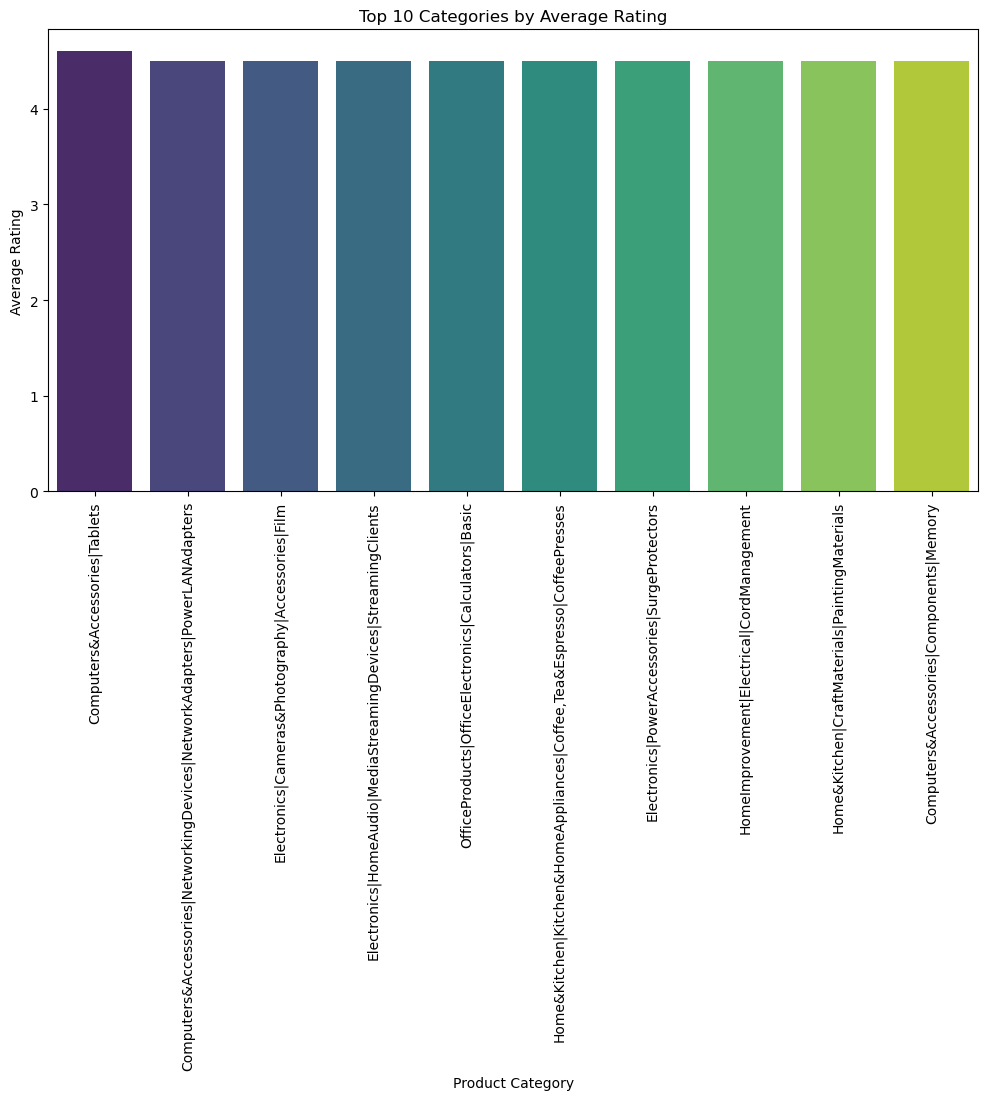

In [14]:
# Calculating average rating by category
avg_rating_by_category = amzn_data.groupby('category')['rating'].mean().reset_index()

# Sorting by average rating and select the top 10 categories
top_categories = avg_rating_by_category.sort_values(by='rating', ascending=False).head(10)

# Bar plot of average rating by top 10 categories
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='rating', data=top_categories, estimator='mean', ci=None, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.show()

C:\Users\Writex_AK_007\AppData\Local\Temp\ipykernel_2892\4011994221.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_by_price = amzn_data.groupby('actual_price_category')['rating'].mean().reset_index()


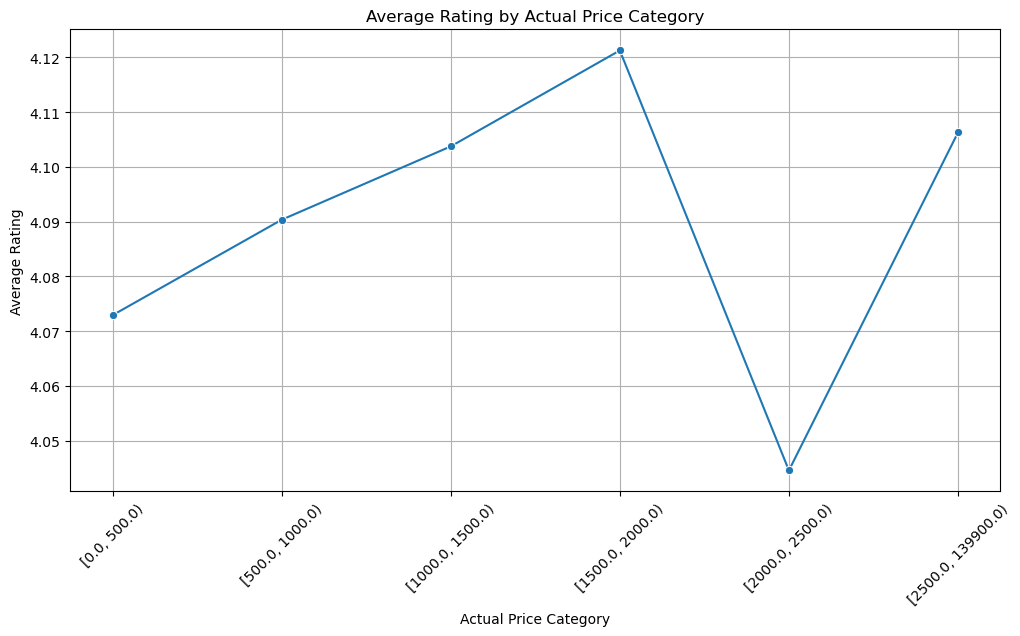

In [15]:
# Create bins for actual prices for line graph
actual_price_bins = [0, 500, 1000, 1500, 2000, 2500, amzn_data['actual_price'].max()]

# Create a new column for actual price categories
amzn_data['actual_price_category'] = pd.cut(amzn_data['actual_price'], bins=actual_price_bins, right=False)

# Calculate the average rating for each actual price category
average_rating_by_price = amzn_data.groupby('actual_price_category')['rating'].mean().reset_index()

# Convert the price categories to strings for better plotting
average_rating_by_price['actual_price_category'] = average_rating_by_price['actual_price_category'].astype(str)

# Plotting the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_rating_by_price, x='actual_price_category', y='rating', marker='o')
plt.title('Average Rating by Actual Price Category')
plt.xlabel('Actual Price Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

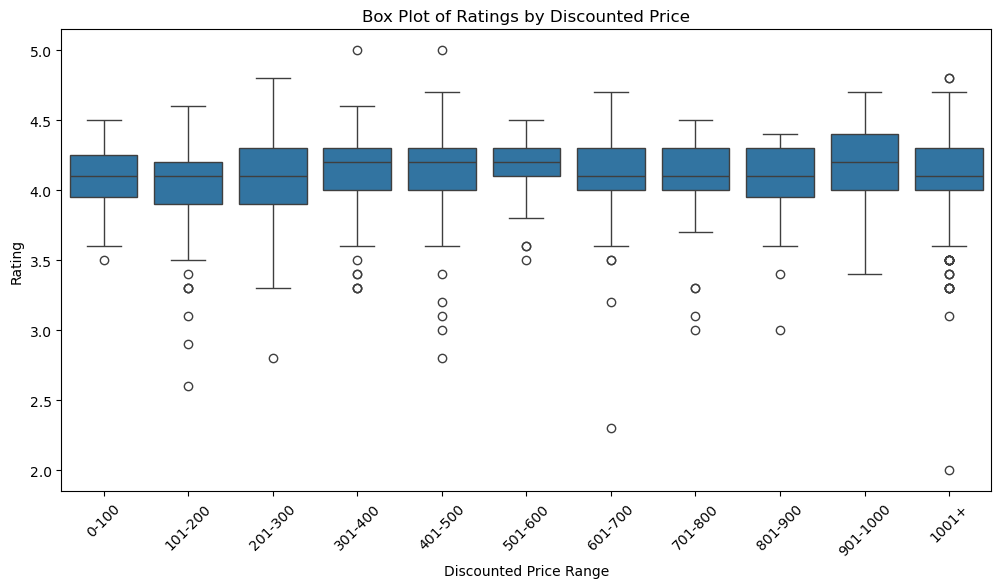

In [16]:
# Creating bins for discounted prices
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, amzn_data['discounted_price'].max()]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '1001+']

# Adding a new column to the dataframe for the price category
amzn_data['discount_price_category'] = pd.cut(amzn_data['discounted_price'], bins=bins, labels=labels, right=False)

# Box plot of ratings by discounted price category
plt.figure(figsize=(12, 6))
sns.boxplot(x='discount_price_category', y='rating', data=amzn_data)
plt.xticks(rotation=45)
plt.title('Box Plot of Ratings by Discounted Price')
plt.xlabel('Discounted Price Range')
plt.ylabel('Rating')
plt.show()

In [17]:
# Additional Analysis: Summary Statistics
descriptive_stats = amzn_data.describe()

print("\nDescriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
       discounted_price   actual_price       rating
count       1463.000000    1463.000000  1462.000000
mean        3129.277122    5451.068544     4.096717
std         6948.222850   10881.018448     0.289497
min           39.000000      39.000000     2.000000
25%          325.000000     800.000000     4.000000
50%          799.000000    1690.000000     4.100000
75%         1999.000000    4312.500000     4.300000
max        77990.000000  139900.000000     5.000000
